**This notebook is an exercice of the course Introduction "Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning" (deeplearning.ai) of Coursera.**

The exercice was to create a classifier of hapiness vs sadness. The happy or sad dataset contains 80 images of emojis, 40 happy and 40 sad. 

The clasifier is a convolutional neural network that trains to 100% accuracy on these images.

I addition to the exercice, I added the dataset visualization and the layers visualization at the end.


# Download and extract dataset

In [1]:
import os
import zipfile


!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

--2019-05-26 11:44:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-05-26 11:44:34 (137 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



# Dataset visualization

In [0]:
# Show parts of the dataset

# Directory with our training horse pictures
train_happy_dir = os.path.join('/tmp/h-or-s/happy')

# Directory with our training human pictures
train_sad_dir = os.path.join('/tmp/h-or-s/sad')

In [3]:
print('total training happy images:', len(os.listdir(train_happy_dir)))
print('total training sad images:', len(os.listdir(train_sad_dir)))

total training happy images: 40
total training sad images: 40


In [4]:
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

['happy2-17.png', 'happy1-14.png', 'happy2-12.png', 'happy2-05.png', 'happy2-14.png', 'happy1-09.png', 'happy1-15.png', 'happy2-18.png', 'happy2-08.png', 'happy1-02.png']
['sad2-13.png', 'sad1-13.png', 'sad1-12.png', 'sad1-19.png', 'sad2-07.png', 'sad2-03.png', 'sad2-04.png', 'sad1-09.png', 'sad1-11.png', 'sad2-09.png']


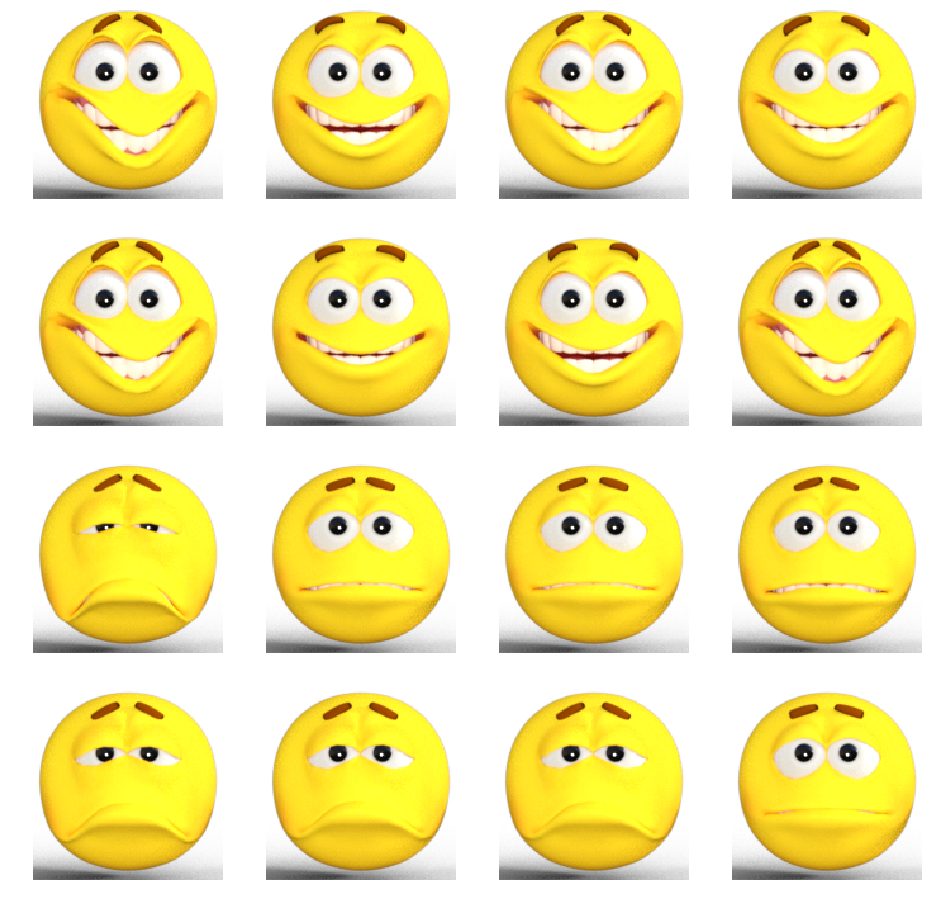

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Deep model

## Callbacks & Tensorboard

In [0]:
import tensorflow as tf

In [0]:
#Reset graph and deleting existing model
tf.keras.backend.clear_session()

In [0]:
DESIRED_ACCURACY = 0.999

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs={}):
    if (logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

## Model definition

In [10]:
# Define and Compile the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0         
__________

## Generators instanciation

In [12]:
# Create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory('/tmp/h-or-s/', target_size=(150, 150), batch_size=10, class_mode='binary')

Found 80 images belonging to 2 classes.


## Training

In [13]:
history = model.fit_generator(train_generator, steps_per_epoch=2, epochs=20, callbacks=[callbacks])

# Expected output: "Reached 99.9% accuracy so cancelling training!""

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
8/8 [==============================] - 3s 386ms/step - loss: 1.2504 - acc: 0.5750
Epoch 2/20
8/8 [==============================] - 3s 315ms/step - loss: 0.3442 - acc: 0.8250
Epoch 3/20
8/8 [==============================] - 3s 315ms/step - loss: 0.2194 - acc: 0.9125
Epoch 4/20
8/8 [==============================] - 2s 304ms/step - loss: 0.1099 - acc: 0.9625
Epoch 5/20
8/8 [==============================] - 3s 321ms/step - loss: 0.2012 - acc: 0.9000
Epoch 6/20
8/8 [==============================] - 3s 318ms/step - loss: 0.0508 - acc: 0.9875
Epoch 7/20
8/8 [==============================] - 3s 318ms/step - loss: 0.0674 - acc: 0.9750
Epoch 8/20
8/8 [==============================] - 2s 308ms/step - loss: 0.0633 - acc: 0.9625
Epoch 9/20
8/8 [==============================] - 3s 322ms/step - loss: 0.0391 - acc: 0.9875
Epoch 10/20
7/8 [=========================>....] - ETA: 0s - loss: 0.0138 - acc: 1.0000
Reached 99.9% accuracy so c

## Visualizing Intermediate Representations

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


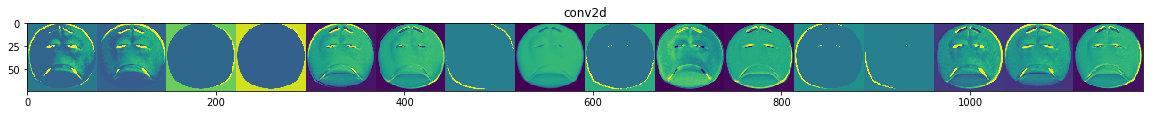

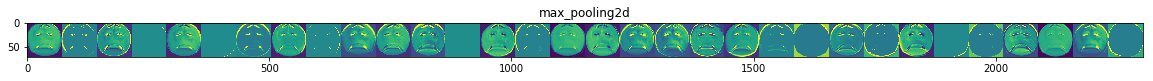

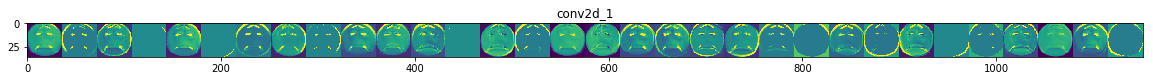

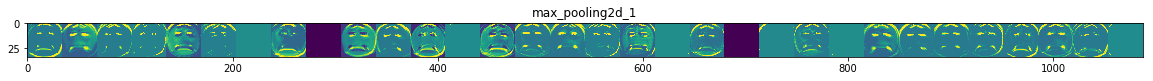

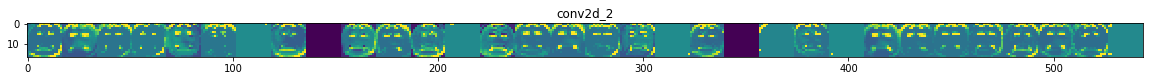

In [14]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
happy_img_files = [os.path.join(train_happy_dir, f) for f in train_happy_names]
sad_img_files = [os.path.join(train_sad_dir, f) for f in train_sad_names]
img_path = random.choice(happy_img_files + sad_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

As we can see, the last conv layer seems to extract the most important features like the eyes and the mouth. Indeed these two elements seems to be the most relevants to detect if the emojis is smiling or not.